# Subproject b
- Platform attributes
- Author: Cecilia Avilés Robles (GitHub: cecyar) (mail: cecyar@gmail.com)

---

## Packages installation and imports required

In [6]:
!pip install --user -q nltk

In [7]:
!pip install --user -q unidecode

In [8]:
!pip install --user -q wordcloud

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [10]:
import os
import nltk
from nltk import * 
from nltk.corpus import stopwords
from unidecode import unidecode

#import nltk.corpus
#from nltk import word_tokenize
#from nltk.tokenize import word_tokenize
#from nltk.probability import FreqDist

## Importing & Cleaning Data

First, we import the raw data and save it to a dataframe for further use.

In [11]:
data = pd.read_csv("project_data.csv")
data

,ID,ID del Médico,Codigo Medico,Especialidad del Médico,¿Ha considerado ofrecer consultas médicas a distancia (teleconsultas) a través de videoconferencias a sus pacientes?,"¿Del 1 al 5, qué tan común considera que será que sus pacientes soliciten teleconsultas médicas para atender sus padecimientos?","¿Cuenta con alguna plataforma digital que le ayude con la administración de sus servicios médicos (Por Ejemplo: con la gestión de citas, pagos, seguimiento a pacientes)?",¿Cuáles?,¿Cuenta con alguna plataforma digital para ofrecer teleconsultas?,¿Cuáles?2,Seleccione las funcionalidades que considera importantes para que estén presentes en una plataforma digital que lo apoye con la gestión de sus servicios médicos.,¿Cuánto estaría dispuesto a pagar mensualmente por el uso de la plataforma descrita?,"Si le ofrecieran una plataforma digital a un precio competitivo para facilitarle la gestión de su agenda de citas, cobros y seguimientos a pacientes, así como la posibilidad de llevar a cabo telec...",Fecha de nacimiento
0,721,1511533,1511533,Endocrinólogo,SI,5: Totalmente Común,SI,"No especifico, solicito llamada en agosto",SI,No especifico,"Solicito llamada después, estaba ocupada;",No pagaría por una,3: Neutral,26/03/70
1,386,1561268,1561268,Endocrinólogo,SI,3: Neutral,NO,NaN,NO,NaN,Envío y recepción de documentos con cliente (e...,No pagaría por una,3: Neutral,29/05/77
2,652,1514853,1514853,Internista,SI,2: Poco común,NO,NaN,SI,Skype,Creación automática de videoconferencias con c...,No pagaría por una,1: No la utilizaría,01/01/78
3,362,2166821,2166821,Internista,SI,3: Neutral,NO,NaN,SI,"Whatsap, zoom, meet",Envío y recepción de documentos con cliente (e...,No pagaría por una,2: Con poca regularidad,0
4,28,..,..,Internista,SI,4: Muy Común,NO,NaN,NO,NaN,Creación automática de videoconferencias con c...,Menos de $750,3: Neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,533,joel,joel,Internista,NO,4: Muy Común,NO,NaN,NO,NaN,Creación automática de videoconferencias con c...,No pagaría por una,5: Regularmente,0
761,201,OZ,OZ,Internista,NO,5: Totalmente Común,NO,NaN,NO,NaN,Envío y recepción de documentos con cliente (e...,No pagaría por una,1: No la utilizaría,0
762,40,pitaluis,pitaluis,Internista,SI,2: Poco común,NO,NaN,NO,NaN,Creación automática de videoconferencias con c...,No pagaría por una,2: Con poca regularidad,0
763,63,Q531206,531206,Internista,NO,1: No será común,NO,NaN,NO,NaN,Administración de citas;,No pagaría por una,1: No la utilizaría,0


The original column names are stored in a list (in case they are needed). Then, they are changed to a shorter name for easier manipulation.

In [12]:
column_names = list(data.columns)

In [13]:
data.columns = ['ID', 'IDMED', 'COD', 'ESP', 'P1_CONSULTAS', 'P2_RANKING', 'P3_PLAT ADMON', 'R3', 'P4_PLAT CONSULTA',
               'R4', 'P5_ATRIBUTOS', 'P6_PAGO', 'P7_DISPOSICION', 'FNAC'] 

The objective of this subproject is to analyze _"what are the attributes that doctors value the most in a technological platform that enhances their services"_. This data is repesented in the answers given in column `P5_ATRIBUTOS`, therefore it will be stored in a separate object for further analysis.

In [14]:
attributes = data["P5_ATRIBUTOS"]
attributes.size

765

## Data Analysis

Since the data we are working with is of the type `string`, it will be first saved in a `list` that will be converted to a `string` afterwards.

In [15]:
raw_attributes = []

for i in range(0, attributes.size):
    text_i = str(attributes[i])
    raw_attributes.append(text_i)      #List

text_attributes = str(raw_attributes)  #String

Then, the default answers are defined in different variables and are used to create an array named `answers`.

In [16]:
answer_1a = "Creación automática de videoconferencias con clientes"
answer_1b = "Creación automática de videoconferencias"
answer_2 = "Envío y recepción de documentos con cliente (estudios, recetas médicas)"
answer_3 = "Administración de citas"
answer_4 = "Gestión de pagos"
answer_5 = "Despliegue de encuestas de satisfacción de clientes"
answer_6 = "Aplicación de promociones de descuento para clientes"

answers = [answer_1a, answer_1b, answer_2, answer_3, answer_4, answer_5, answer_6]

The array `answers` is used to count the number of occurrences each answer has in the string `text_attributes`.

In [17]:
pre_counts = []

for i in range(0, len(answers)):
    count_i = text_attributes.count(answers[i])
    pre_counts.append(count_i)

The occurrences were stored in the arrary `pre_counts`. Since the default _answer 1_ was changed during the interview period, there are two possible answers that refer to the same one. Therefore, entries $0$ and $1$ are added to correctly represent this occurrence. The appropriate counts are stored in array `counts`.

In [18]:
counts = [pre_counts[0] + pre_counts[1], pre_counts[2], pre_counts[3], pre_counts[4], pre_counts[5], pre_counts[6]]
counts

[536, 363, 379, 245, 90, 111]

**Plotting the default answers**

Creating a label to be used in the plot.

In [19]:
label = "1. "+answer_1a+"\n"+"2. "+answer_2+"\n"+"3. "+answer_3+"\n"+"4. "+answer_4+"\n"+"5. "+answer_5+"\n"+"6. "+answer_6

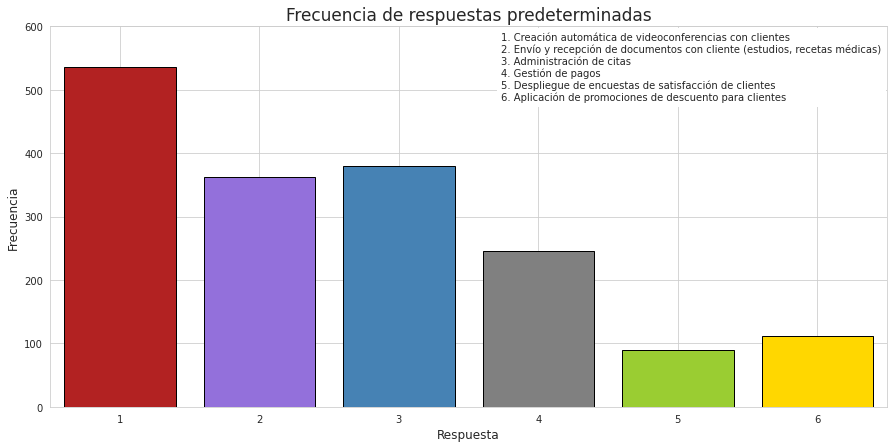

In [20]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = (15,7))

x = np.arange(1,7,1)
plt.bar(x, counts, color = ["firebrick","mediumpurple","steelblue","gray","yellowgreen","gold"], edgecolor = "black")
plt.text(3.73, 483, label, bbox = {"facecolor": "white"})  
plt.axis([0.5, 6.5, 0, 600])
plt.title("Frecuencia de respuestas predeterminadas", fontsize = 17)
plt.xlabel("Respuesta", fontsize = 12)
plt.ylabel("Frecuencia", fontsize = 12)
plt.show()

We then want to show the default answers by percentages. For this matter, we will use a pie chart.

In [49]:
pie_answers = [answer_1a, answer_2, answer_3, answer_4, answer_5, answer_6]
plot_info = pd.DataFrame({"Answer": pie_answers, "Freq": counts,})
pie_info = plot_info.sort_values(by = "Freq", ascending = False)

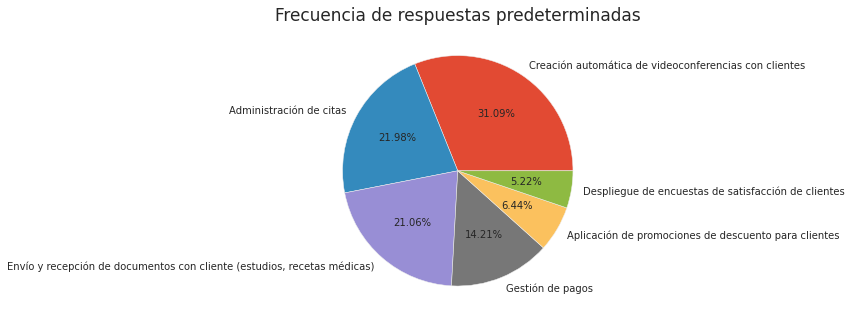

In [50]:
sns.set_style("whitegrid")
plt.style.use("ggplot")

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis("equal")
ax.pie(pie_info.Freq, labels = pie_info.Answer, autopct = "%1.2f%%")
plt.title("Frecuencia de respuestas predeterminadas", fontsize = 17)
plt.show()

Next, we want to show if there is any correlation between the age of the doctors and their disposition to use an online platform (represented by selecting some of the default answers or no).

For this, a new dataframe `birth_info` will be created with columns `P5_ATRIBUTOS`and `FNAC` of the raw data.

In [51]:
attributes2 = data["P5_ATRIBUTOS"]
birthdates = data["FNAC"]

In [24]:
birth_info = pd.DataFrame({'BirthDate': birthdates, 'Attributes': attributes2,})

Then, we calculate an _approximate age_ based only on the birth year. We create a list `year` with this calculation, and then append it to the dataframe `birth_info`.

In [25]:
year = []
for i in range(0,birth_info.shape[0]):
    year_i = 120 - int(birth_info.BirthDate[i][-2:])
    year.append(year_i)

In [26]:
dfyear = pd.DataFrame(year, columns = ["Age"])

In [27]:
birth_info["Age"] = dfyear["Age"]

Now we add new `flag` columns to indicate whether a default answer was selected ("Yes") or no ("No"). Additionally, the same is done for the optinal answer _"Todas"_.

In [28]:
birth_info['A1_flag'] = np.where(birth_info['Attributes'].str.contains(answer_1b), 'Yes', 'No')
birth_info['A2_flag'] = np.where(birth_info['Attributes'].str.contains("Envío y recepción de documentos con cliente"), 'Yes', 'No')
birth_info['A3_flag'] = np.where(birth_info['Attributes'].str.contains(answer_3), 'Yes', 'No')
birth_info['A4_flag'] = np.where(birth_info['Attributes'].str.contains(answer_4), 'Yes', 'No')
birth_info['A5_flag'] = np.where(birth_info['Attributes'].str.contains(answer_5), 'Yes', 'No')
birth_info['A6_flag'] = np.where(birth_info['Attributes'].str.contains(answer_6), 'Yes', 'No')
birth_info['An_flag'] = np.where(birth_info['Attributes'].str.contains("Todas"), 'Yes', 'No')
birth_info.shape

(765, 10)

Later, we delete the rows in which no birth date was given, to exlude them from our analysis.

In [52]:
indexNames = birth_info[ (birth_info['Age'] == 120) | (birth_info['Age'] == 119) ].index
birth_info.drop(indexNames, inplace = True)
birth_info.shape

(730, 11)

Then, function `answers_pre` is defined to evaluate whether a `flag` column has `Yes` or `No`. It is later added to the dataframe `birth_info` in the new column `Boolean_Answer`.

In [53]:
def answers_pre (row):
   if row["A1_flag"] == "Yes" :
      return "Yes"
   if row["A2_flag"] == "Yes" :
      return "Yes"
   if row["A3_flag"] == "Yes" :
      return "Yes"
   if row["A4_flag"] == "Yes":
      return "Yes"
   if row["A5_flag"]  == "Yes":
      return "Yes"
   if row["A6_flag"] == "Yes":
      return "Yes"
   if row["An_flag"] == "Yes":
      return "Yes"
   return "No"

In [54]:
birth_info['Boolean_Answer'] = birth_info.apply (lambda row: answers_pre(row), axis = 1)

Lastly, two sub dataframes are created both containing the age of the doctor. The first one is for when the doctor selected one of the default answers (`yes_df`), the second one for when he did not (`no_df`).

In [55]:
yes_df = birth_info[birth_info['Boolean_Answer'] == "Yes"]
yes_df.shape

(627, 11)

In [56]:
no_df = birth_info[birth_info['Boolean_Answer'] == "No"]
no_df.shape

(103, 11)

Now we use these two sub dataframes to plot the age distribution of the two.

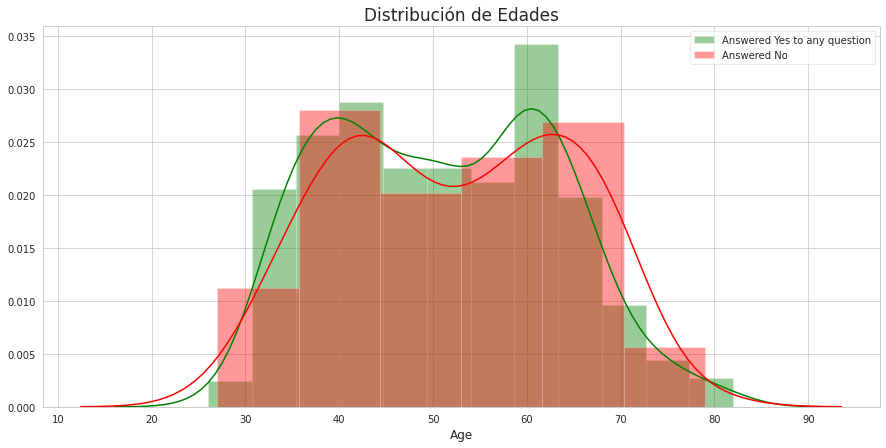

In [57]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = (15,7))

sns.distplot(yes_df["Age"], color = "green", label = "Answered Yes to any question")
sns.distplot(no_df["Age"], color = "red", label = "Answered No")
plt.title("Distribución de Edades", fontsize = 17)
plt.legend()

We combine the two sub dataframes in order to make a scatter plot.

In [58]:
yes_info = pd.DataFrame({"Age": yes_df.Age, "Boolean_Ans": yes_df.Boolean_Answer,})
no_info = pd.DataFrame({"Age": no_df.Age, "Boolean_Ans": no_df.Boolean_Answer,})
scatter_info = yes_info.append(no_info)

Text(0.5, 1.0, 'Dispersión de Edades')

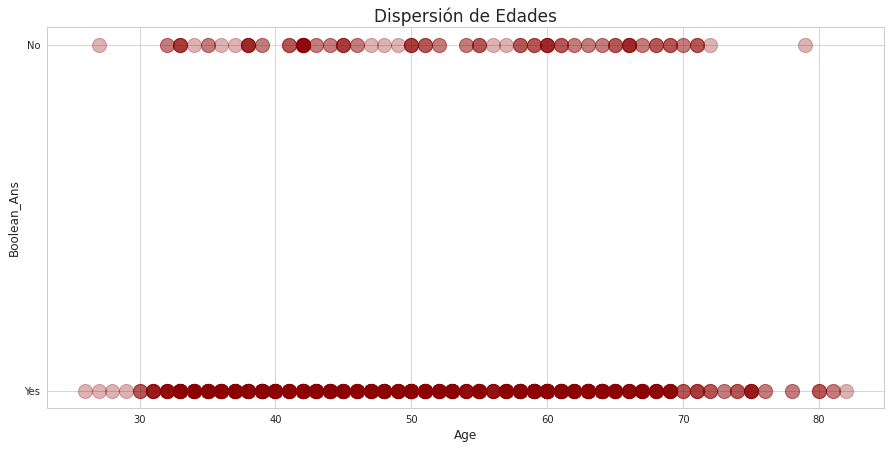

In [60]:
fig = plt.figure(figsize = (15,7))
sns.set_style("whitegrid")

sns.regplot(x = scatter_info["Age"], y = scatter_info["Boolean_Ans"], fit_reg = False, scatter_kws = {"color":"darkred","alpha":0.3,"s":200})
plt.title("Dispersión de Edades", fontsize = 17)

Based on the distribution and scatter plots, we conclude that there is no correlation between the age of the doctors and their disposition to use an online platform (represented by selecting some of the default answers or no).

## Analyzing the inputs from the _optional_ answer (written data)

In case the doctor did not want to select one of the default answers, there was an _optional_ 7th answer in which they could write whatever they wanted. This "free text" needs to be part of the analysis.

We start by deleting the default answers from the string `text_attributes` and stored the new string in `pre_written_answers`.

In [37]:
pre_written_ans = text_attributes

for i in range(0, len(answers)):
    pre_written_ans = pre_written_ans.replace(str(answers[i]),"")
    
#print(pre_written_ans)        #Remove the hashtag at the beginning to see the result

This new string has to be filtered in order to remove characters as `;`, `'`, `,`, `[`, `]`, `(` and `)`. This is achieved with the following line of code.

In [61]:
pre_written_ans = pre_written_ans.translate({ord(i): None for i in ";',[]()"})
#pre_written_ans               #Remove the hashtag at the beginning to see the result

Now we remove all special characters and change the words to lowercase.

In [62]:
pre_written_ans = unidecode(pre_written_ans).lower()
#pre_written_ans               #Remove the hashtag at the beginning to see the result

In order to obtain a better analysis, the words defined in array `to_replace` will be changed with the words defined in array `replaced`. This new string is saved in `written_ans`.

In [40]:
to_replace = ["intereza", "interezado", "interesaria", "interesado", "."]
replaced = ["interesa", "interesa", "interesa", "interesa", ""]

In [63]:
written_ans = pre_written_ans

for i in range(0, len(to_replace)):
    written_ans = written_ans.replace(to_replace[i],replaced[i])
    
#written_ans                 #Remove the hashtag at the beginning to see the result

Now, I will use the info provided in [Text Mining in Python](https://medium.com/towards-artificial-intelligence/text-mining-in-python-steps-and-examples-78b3f8fd913b) to do some language processing.

First, we do a _tokenization_, which means breaking the string into tokens which in turn are small structures or units.

In [64]:
nltk.download('punkt')

token_words = word_tokenize(written_ans)

[nltk_data] Downloading package punkt to /home/miuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Then, we find the frequency of each token in order to identify and show the top 30 words.

In [66]:
fdist = FreqDist(token_words)
fdist_top = fdist.most_common(30)
fdist_top

[('no', 57),
 ('que', 19),
 ('interesa', 19),
 ('ninguna', 16),
 ('le', 13),
 ('de', 12),
 ('el', 11),
 ('la', 11),
 ('me', 9),
 ('en', 8),
 ('a', 8),
 ('todo', 7),
 ('esta', 7),
 ('todas', 6),
 ('calidad', 6),
 ('y', 6),
 ('lo', 6),
 ('informacion', 6),
 ('por', 6),
 ('es', 5),
 ('con', 5),
 ('nos', 5),
 ('se', 5),
 ('o', 4),
 ('hospital', 4),
 ('muy', 4),
 ('buena', 3),
 ('apoye', 3),
 ('he', 3),
 ('mi', 3)]

We can see there are a lot of words that do not offer any value for the analysis. These are called _"Stop words"_ and are interpreted as the most common words in any language (in spanish they will be equivalent to _artículos, preposiciones, conjunciones, etc._). These words do not provide any meaning and are usually removed from texts. We will remove these stop words with the following code.

In [71]:
nltk.download("stopwords")
a = set(stopwords.words("spanish"))

pre_processed_text = word_tokenize(written_ans.lower())
processed_text = [x for x in pre_processed_text if x not in a]

#print(processed_text)            #Remove the hashtag at the beginning to see the result

[nltk_data] Downloading package stopwords to /home/miuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Again, we find the frequency of each token in order to identify and show the top 30 words.

In [73]:
fdist2 = FreqDist(processed_text)

In [74]:
fdist_top2 = fdist2.most_common(30)
fdist_top2

[('interesa', 19),
 ('ninguna', 16),
 ('todas', 6),
 ('calidad', 6),
 ('informacion', 6),
 ('hospital', 4),
 ('buena', 3),
 ('apoye', 3),
 ('necesita', 3),
 ('usaria', 3),
 ('pacientes', 3),
 ('varias', 3),
 ('momento', 3),
 ('plataformas', 3),
 ('usa', 2),
 ('whats', 2),
 ('app', 2),
 ('creo', 2),
 ('especificar', 2),
 ('solo', 2),
 ('seguimiento', 2),
 ('dar', 2),
 ('informativa', 2),
 ('realmente', 2),
 ('ver', 2),
 ('util', 2),
 ('bueno', 2),
 ('solicito', 1),
 ('llamada', 1),
 ('despues', 1)]

We can see there is a better analysis of the written words. We will use this information to plot a Word Cloud for academic purposes.

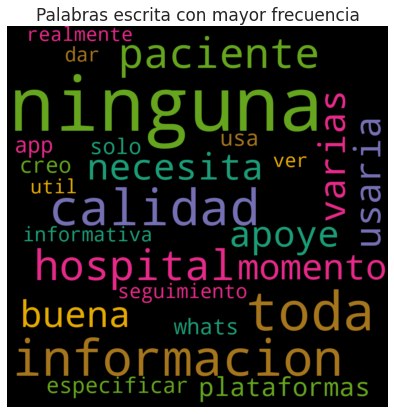

In [85]:
str_processed_text = str(processed_text)
str_processed_text = str_processed_text.translate({ord(i): None for i in "',"})

fig = plt.figure(figsize = (7,7))
wordcloud = WordCloud(width = 1000, height = 1000, margin = 0, colormap = "Dark2", 
                      max_words = 25, stopwords = ["interesa", "todas"]).generate(str_processed_text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.title("Palabras escrita con mayor frecuencia", fontsize = 17)
plt.show()

**Conclusion**

Our sample size consists of $765$ answers given by 765 doctors. The $82$% selected one of the default answers versus the $13$% that did not, the $5$% did not provide their birth date information.

From the $13$% that choose not to select one of the default answers, we analyzed the given text. 
* The most common given answer was negative towards the digital platform, representing roughly the $10$% of the total sample (57 `No` plus 19 `Ninguna`). 
* Almost the $1.5$% value either the _quality_ or the _information_ available on hypothetical digital platform. 
* The rest of the common words do not provide any significant information due to very low sample size and no specific trend observed.